# Wizualizacja i przygotowanie danych

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("churn.txt")
df.head()

State  Account Length  Area Code     Phone Int'l Plan VMail Plan  \
0    KS             128        415  382-4657         no        yes   
1    OH             107        415  371-7191         no        yes   
2    NJ             137        415  358-1921         no         no   
3    OH              84        408  375-9999        yes         no   
4    OK              75        415  330-6626        yes         no   

   VMail Message  Day Mins  Day Calls  Day Charge  ...  Eve Calls  Eve Charge  \
0             25     265.1        110       45.07  ...         99       16.78   
1             26     161.6        123       27.47  ...        103       16.62   
2              0     243.4        114       41.38  ...        110       10.30   
3              0     299.4         71       50.90  ...         88        5.26   
4              0     166.7        113       28.34  ...        122       12.61   

   Night Mins  Night Calls  Night Charge  Intl Mins  Intl Calls  Intl Charge  \
0       244.7           91         11.01       10.0           3         2.70   
1       254.4          103         11.45       13.7           3         3.70   
2       162.6          104          7.32       12.2           5         3.29   
3       196.9           89          8.86        6.6           7         1.78   
4       186.9          121          8.41       10.1           3         2.73   

   CustServ Calls  Churn?  
0               1  False.  
1               1  False.  
2               0  False.  
3               2  False.  
4               3  False.  

[5 rows x 21 columns]

### Zadanie 1. (1 pkt)
> Zbadaj korelację pomiędzy zmiennymi *Day Mins* i *Day Calls* a zmienną *Day Charge* przy pomocy wykresów punktowych.
>
> Czy istnieje jakaś zależność? Jeśli tak, to jaka? Dlaczego jest lub jej nie ma? Co o tym sądzisz?

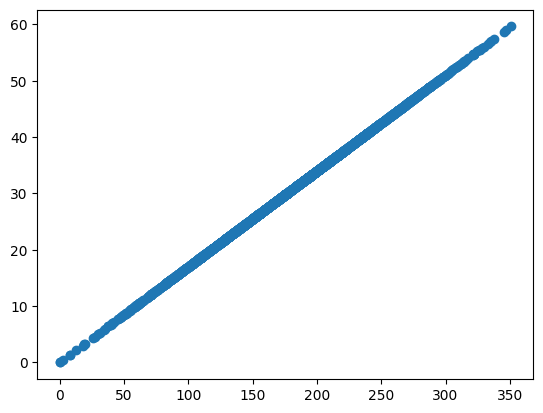

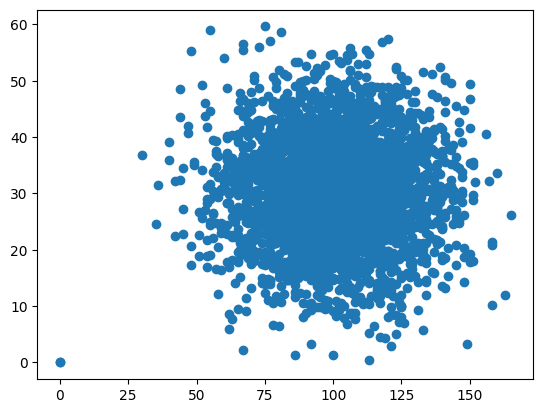

In [5]:
# Miejsce na rozwiązanie
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(df['Day Mins'],df['Day Charge'])
plt.show()

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(df['Day Calls'],df['Day Charge'])
plt.show()

Pomiędzy zmiennymi Day Mins a Day Charge występuje zależność liniowa. Ma to sens ponieważ dzienna opłata za rozmowy jest wprost proporcjonalna do ilości minut rozmowy tego dnia.

Pomiędzy zmiennymi Day Calls a Day Charge nie występuje żadna zależność, ponieważ nie da się określić opłaty za rozmowy tylko na podstawie ilości połączeń

### Zadanie 2. (1 pkt)
> Zbadaj, czy istnieją punkty oddalone dla zmiennych *Account Length* i *Day Charge*. Jeśli istnieją, to co można z nimi zrobić? Które rozwiązanie według Ciebie jest w tym przypadku najlepsze? Dlaczego?
>
> Wykorzystaj w zadaniu histogram i wykres pudełkowy.

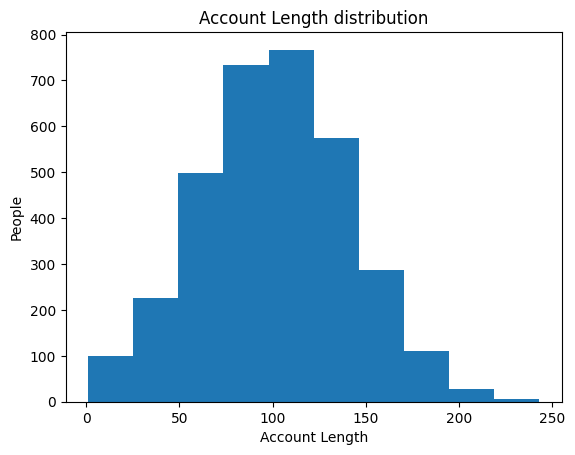

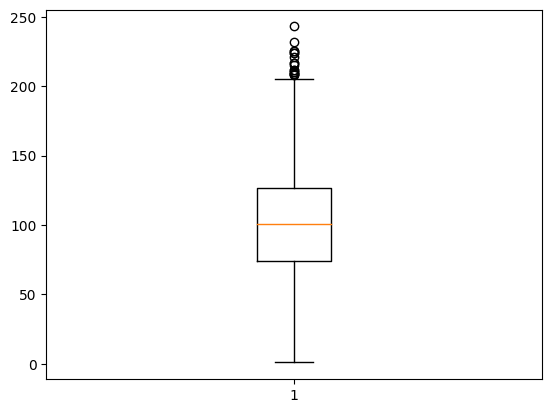

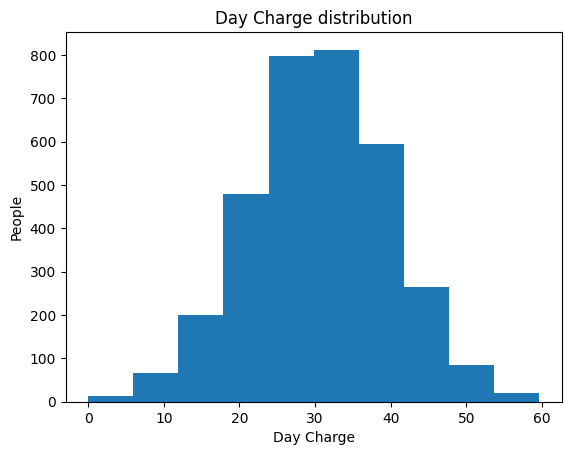

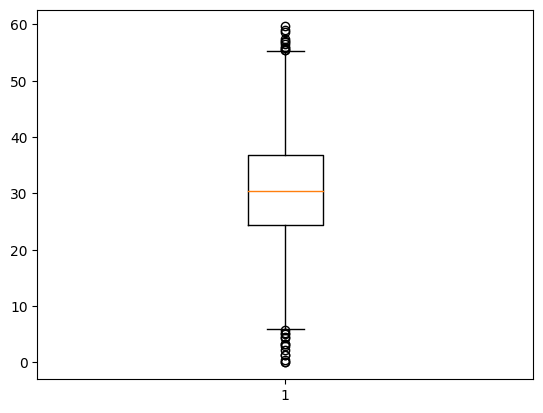

In [9]:
# Miejsce na rozwiązanie

#Account Length
fig=plt.figure() # Tworzenie obiektu rysunku
# Dodanie podwykresu - rysunek nie może być pusty
ax = fig.add_subplot(1,1,1)
# Zmienna
plt.hist(df['Account Length'],bins = 10)
# Etykiety i nagłówek
plt.title('Account Length distribution')
plt.xlabel('Account Length')
plt.ylabel('People')
plt.show()
fig=plt.figure()
ax = fig.add_subplot(1,1,1)

ax.boxplot(df['Account Length'])
plt.show()

#Day Charge
fig=plt.figure() # Tworzenie obiektu rysunku
# Dodanie podwykresu - rysunek nie może być pusty
ax = fig.add_subplot(1,1,1)
# Zmienna
plt.hist(df['Day Charge'],bins = 10)
# Etykiety i nagłówek
plt.title('Day Charge distribution')
plt.xlabel('Day Charge')
plt.ylabel('People')
plt.show()
fig=plt.figure()
ax = fig.add_subplot(1,1,1)

ax.boxplot(df['Day Charge'])
plt.show()

Zarówno dla zmiennej Account Length jak i Day Charge istnieją punkty odstające (widoczne jako kropki na wykresach pudełkowych). Punktów tych można się pozbyć lub uśrednić ich wartości uwzględniając wartości wszystkich próbek.

### Zadanie 3. (1 pkt)
> Wykonaj normalizację **Min-Max** na zmiennej *Day Mins* i dodaj ją do DataFrame. Czy po normalizacji występuje korelacja ze zmienną *Day Charge*? Dlaczego? Co o tym sądzisz?
>
> **Wskazówka:** Skorzystaj z operacji na tablicach i funkcji, jakie oferuje biblioteka NumPy.

In [10]:
# Miejsce na rozwiązanie
def min_max_normalization(data):
    min_val = np.min(data)
    max_val = np.max(data)
    normalized_data = (data - min_val) / (max_val - min_val)
    return normalized_data

df["Day Mins"] = min_max_normalization(df["Day Mins"])

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(df['Day Mins'],df['Day Charge'])
plt.show()

Po normalizacji zależność pomiędzy zmienną Day Mins a Day Charge wciąż pozostaje liniowa. Dzieje się tak, ponieważ normalizacja min-max zachowuje proporcje między wartościami danych. Warto zdawać sobię sprawę z tej cechy normalizacji min-max, gdy zamierza się ją wykorzystywać.